## Keras -- MLPs on MNIST

In [2]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

C:\Users\saicharan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    plt.plot(x, vy, 'b', label="Validation Loss")
    plt.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    plt.show()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [64]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [14]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [15]:
# An example data point
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [16]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [6]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:

from keras.models import Sequential 
from keras.layers import Dense, Activation 

In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

# MODEL-1 with two hidden layers (784-324-124-10)

<h2> 1.1 MLP + ReLU + ADAM </h2>

In [17]:
model_relu = Sequential()
model_relu.add(Dense(324, activation='relu', input_shape=(input_dim,), kernel_initializer= 'he_normal'))
model_relu.add(Dense(124, activation='relu', kernel_initializer='he_normal' ))
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 324)               254340    
_________________________________________________________________
dense_5 (Dense)              (None, 124)               40300     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1250      
Total params: 295,890
Trainable params: 295,890
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.2518 - acc: 0.9272 - val_loss: 0.1157 - val_acc: 0.9651
Epoch 2/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0939 - acc: 0.9715 - val_loss: 0.0850 - val_acc: 0.9750
Epoch 3/20
60000/60000 [==============================] - 2s 31us/step 

Test score: 0.08824123702579437
Test accuracy: 0.9818


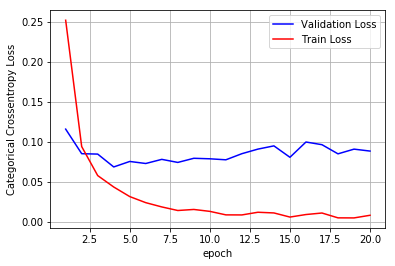

In [18]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = hist.history['val_loss']
ty = hist.history['loss']
plt_dynamic(x, vy, ty, ax)

**summary**
Here the train loss keeps decreasing as the no of epochs increases,but the validation loss is not decreasing,it means that the
model is overfitting ,here we didnot use batch normalization and dropouts ,and this model is not sensible

 <h2>1.2 MLP + ReLU + ADAM +Batch Norm  </h2>

In [20]:
# Multilayer perceptron

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(324, activation='relu', input_shape=(input_dim,), kernel_initializer='he_normal'))
model_batch.add(BatchNormalization())

model_batch.add(Dense(124, activation='relu', kernel_initializer='he_normal') )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 324)               254340    
_________________________________________________________________
batch_normalization_1 (Batch (None, 324)               1296      
_________________________________________________________________
dense_9 (Dense)              (None, 124)               40300     
_________________________________________________________________
batch_normalization_2 (Batch (None, 124)               496       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1250      
Total params: 297,682
Trainable params: 296,786
Non-trainable params: 896
_________________________________________________________________


In [21]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.2114 - acc: 0.9366 - val_loss: 0.1220 - val_acc: 0.9609
Epoch 2/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0788 - acc: 0.9763 - val_loss: 0.1007 - val_acc: 0.9694
Epoch 3/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0502 - acc: 0.9847 - val_loss: 0.0765 - val_acc: 0.9781
Epoch 4/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0379 - acc: 0.9883 - val_loss: 0.0882 - val_acc: 0.9744
Epoch 5/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0286 - acc: 0.9904 - val_loss: 0.0891 - val_acc: 0.9758
Epoch 6/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0226 - acc: 0.9927 - val_loss: 0.0761 - val_acc: 0.9773
Epoch 7/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0203 - acc: 0.9932 - val_loss: 0.0831 - val_acc

Test score: 0.08035635449174942
Test accuracy: 0.9823


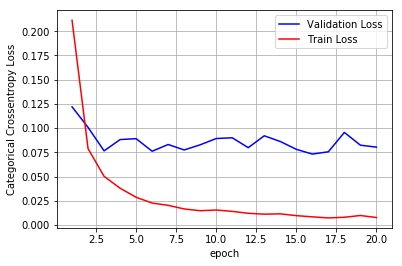

In [22]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**summary**
Here also the train loss keeps decreasing as the no of epochs increases,but the validation loss is not decreasing,it means that the
model is overfitting ,here even with batchnormalization the model is not performing well,and this model is not sensible

 <h2>1.3 MLP + ReLU + ADAM + Dropout </h2>

In [23]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(324, activation='relu', input_shape=(input_dim,), kernel_initializer='he_normal'))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(124, activation='relu', kernel_initializer='he_normal'))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 324)               254340    
_________________________________________________________________
dropout_1 (Dropout)          (None, 324)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 124)               40300     
_________________________________________________________________
dropout_2 (Dropout)          (None, 124)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1250      
Total params: 295,890
Trainable params: 295,890
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.5161 - acc: 0.8402 - val_loss: 0.1653 - val_acc: 0.9490
Epoch 2/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.2349 - acc: 0.9312 - val_loss: 0.1215 - val_acc: 0.9626
Epoch 3/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.1819 - acc: 0.9473 - val_loss: 0.1032 - val_acc: 0.9698
Epoch 4/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.1572 - acc: 0.9545 - val_loss: 0.0910 - val_acc: 0.9719
Epoch 5/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.1360 - acc: 0.9596 - val_loss: 0.0834 - val_acc: 0.9733
Epoch 6/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.1277 - acc: 0.9623 - val_loss: 0.0775 - val_acc: 0.9772
Epoch 7/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.1107 - acc: 0.9661 - val_loss: 0.0783 - val_acc

Test score: 0.06469260362913701
Test accuracy: 0.982


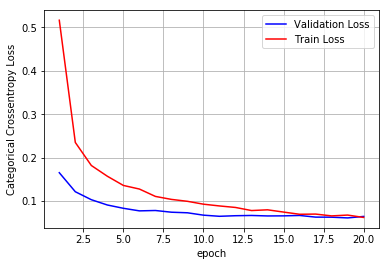

In [25]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**summary**
Here the train loss and validation loss keeps decreasing as the no of epochs increases,it means that we are maximum test accuracy
,here we have used  dropouts as this perform very well,and this model is sensible

 <h2>1.4 MLP + ReLU + ADAM + Batch Norm + Dropout </h2>

In [26]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(324, activation='sigmoid', input_shape=(input_dim,), kernel_initializer='he_normal'))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(124, activation='sigmoid', kernel_initializer='he_normal'))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 324)               254340    
_________________________________________________________________
batch_normalization_3 (Batch (None, 324)               1296      
_________________________________________________________________
dropout_3 (Dropout)          (None, 324)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 124)               40300     
_________________________________________________________________
batch_normalization_4 (Batch (None, 124)               496       
_________________________________________________________________
dropout_4 (Dropout)          (None, 124)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1250      
Total para

In [33]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.0936 - acc: 0.9716 - val_loss: 0.0675 - val_acc: 0.9802
Epoch 2/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0883 - acc: 0.9724 - val_loss: 0.0697 - val_acc: 0.9806
Epoch 3/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0879 - acc: 0.9727 - val_loss: 0.0662 - val_acc: 0.9812
Epoch 4/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0837 - acc: 0.9738 - val_loss: 0.0646 - val_acc: 0.9814
Epoch 5/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0783 - acc: 0.9754 - val_loss: 0.0619 - val_acc: 0.9818
Epoch 6/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0795 - acc: 0.9755 - val_loss: 0.0600 - val_acc: 0.9818
Epoch 7/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0770 - acc: 0.9753 - val_loss: 0.0643 - val_acc

Test score: 0.05908778045142535
Test accuracy: 0.9831


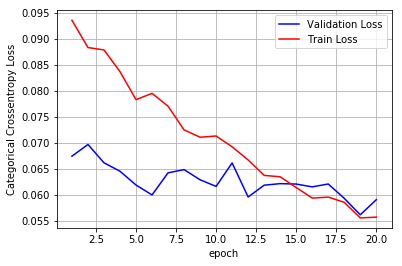

In [34]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**summary**
Here the train loss keeps increasing and decreasing as the no of epochs increases,but the validation loss is gradually decreasing,
it means that the model is not overfitting ,here used both batch normalization and dropouts,but we got similar results as we have 
used dropouts itself ,and this model is sensible.

# MODEL-2 with three hidden layers (784-356-256-156-10)

<h2> 2.1 MLP + ReLU + ADAM </h2>

In [35]:
model_relu = Sequential()
model_relu.add(Dense(356, activation='relu', input_shape=(input_dim,), kernel_initializer= 'he_normal'))
model_relu.add(Dense(256, activation='relu', kernel_initializer='he_normal' ))
model_relu.add(Dense(156, activation='relu', kernel_initializer='he_normal' ))
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 356)               279460    
_________________________________________________________________
dense_23 (Dense)             (None, 256)               91392     
_________________________________________________________________
dense_24 (Dense)             (None, 156)               40092     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1570      
Total params: 412,514
Trainable params: 412,514
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.2316 - acc: 0.9313 - val_loss: 0.1089 - val_acc: 0.9643
Epoch 2/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0862 - acc: 0.9736 - val_loss: 0.0804 - val_acc: 0.9740
Epoch 3/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0562 - acc: 0.9821 - val_loss: 0.0699 - val_acc: 0.9764
Epoch 4/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0401 - acc: 0.9870 - val_loss: 0.0797 - val_acc: 0.9764
Epoch 5/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0302 - acc: 0.9901 - val_loss: 0.0726 - val_acc: 0.9786
Epoch 6/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0264 - acc: 0.9913 - val_loss: 0.0856 - val_acc: 0.9761
Epoch 7/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0211 - acc: 0.9928 - val_loss: 0.0932 - val_acc

Test score: 0.10090933883885768
Test accuracy: 0.9799


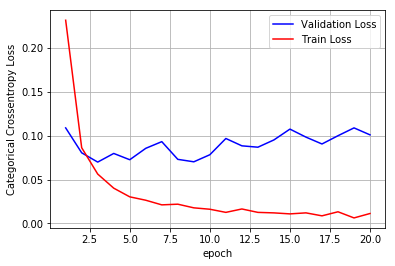

In [37]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**summary**
Here the train loss keeps decreasing as the no of epochs increases,but the validation loss is not decreasing but gradually increasing,
it means that the model is overfitting ,here we didnot use batch normalization and dropouts.so this model is not sensible.

 <h2>2.2 MLP + ReLU + ADAM + Batch Norm  </h2>

In [39]:
# Multilayer perceptron

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(356, activation='relu', input_shape=(input_dim,), kernel_initializer='he_normal'))
model_batch.add(BatchNormalization())
model_batch.add(Dense(256, activation='relu', kernel_initializer='he_normal') )
model_batch.add(BatchNormalization())
model_batch.add(Dense(156, activation='relu', kernel_initializer='he_normal') )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 356)               279460    
_________________________________________________________________
batch_normalization_5 (Batch (None, 356)               1424      
_________________________________________________________________
dense_28 (Dense)             (None, 256)               91392     
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
dense_29 (Dense)             (None, 156)               40092     
_________________________________________________________________
batch_normalization_7 (Batch (None, 156)               624       
_________________________________________________________________
dense_30 (Dense)             (None, 10)                1570      
Total para

In [40]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.1974 - acc: 0.9399 - val_loss: 0.1004 - val_acc: 0.9688
Epoch 2/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0771 - acc: 0.9763 - val_loss: 0.0803 - val_acc: 0.9757
Epoch 3/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0492 - acc: 0.9846 - val_loss: 0.0840 - val_acc: 0.9758
Epoch 4/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0375 - acc: 0.9878 - val_loss: 0.0804 - val_acc: 0.9758
Epoch 5/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0317 - acc: 0.9892 - val_loss: 0.0776 - val_acc: 0.9772
Epoch 6/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0236 - acc: 0.9922 - val_loss: 0.0827 - val_acc: 0.9773
Epoch 7/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.0231 - acc: 0.9925 - val_loss: 0.0991 - val_acc

Test score: 0.08309072787813275
Test accuracy: 0.9808


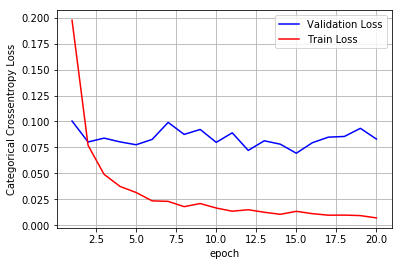

In [41]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**summary**
Here also the train loss keeps decreasing as the no of epochs increases,but the validation loss is decreasing and increasing,
it means that the model is overfitting ,here we used batch normalization,but we got the similar results as in the previoes model where we dint use anything.So this model is not sensible

<h2>2.3 MLP + ReLU + ADAM + Dropout </h2>


In [43]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(356, activation='relu', input_shape=(input_dim,), kernel_initializer='he_normal'))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model_drop.add(Dropout(0.5))
    
model_drop.add(Dense(156, activation='relu', kernel_initializer='he_normal'))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 356)               279460    
_________________________________________________________________
dropout_5 (Dropout)          (None, 356)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 256)               91392     
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 156)               40092     
_________________________________________________________________
dropout_7 (Dropout)          (None, 156)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1570      
Total para

In [44]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 58us/step - loss: 0.6390 - acc: 0.7961 - val_loss: 0.1772 - val_acc: 0.9468
Epoch 2/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.2700 - acc: 0.9239 - val_loss: 0.1428 - val_acc: 0.9569
Epoch 3/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.2096 - acc: 0.9414 - val_loss: 0.1144 - val_acc: 0.9672
Epoch 4/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.1785 - acc: 0.9498 - val_loss: 0.0988 - val_acc: 0.9694
Epoch 5/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.1581 - acc: 0.9559 - val_loss: 0.0931 - val_acc: 0.9714
Epoch 6/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.1421 - acc: 0.9599 - val_loss: 0.0910 - val_acc: 0.9742
Epoch 7/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.1326 - acc: 0.9627 - val_loss: 0.0818 - val_acc

Test score: 0.07323772987398024
Test accuracy: 0.9819


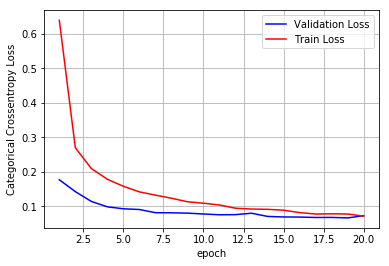

In [45]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**summary**
Here the train loss and validation loss keeps decreasing as the no of epochs increases,it means that the we are getting maximum
test accuracy and the model is performing very well as we have used dropouts .So this model is not sensible

<h2>2.4 MLP + ReLU + ADAM + Batch Norm + Dropout </h2>


In [46]:
from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(356, activation='relu', input_shape=(input_dim,), kernel_initializer='he_normal'))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(156, activation='relu', kernel_initializer='he_normal'))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 356)               279460    
_________________________________________________________________
batch_normalization_8 (Batch (None, 356)               1424      
_________________________________________________________________
dropout_8 (Dropout)          (None, 356)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 256)               91392     
_________________________________________________________________
batch_normalization_9 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 156)               40092     
__________

In [47]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.6069 - acc: 0.8158 - val_loss: 0.1785 - val_acc: 0.9461
Epoch 2/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.2663 - acc: 0.9206 - val_loss: 0.1301 - val_acc: 0.9584
Epoch 3/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.2062 - acc: 0.9388 - val_loss: 0.1169 - val_acc: 0.9636
Epoch 4/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.1789 - acc: 0.9472 - val_loss: 0.1035 - val_acc: 0.9686
Epoch 5/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.1522 - acc: 0.9541 - val_loss: 0.0931 - val_acc: 0.9705
Epoch 6/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.1356 - acc: 0.9584 - val_loss: 0.0852 - val_acc: 0.9739
Epoch 7/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.1306 - acc: 0.9603 - val_loss: 0.0784 - val_acc

Test score: 0.0629213298883522
Test accuracy: 0.982


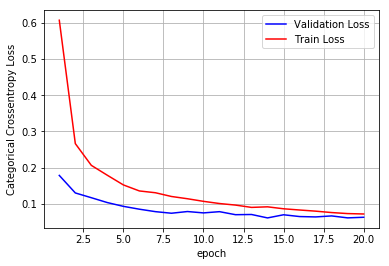

In [48]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**summary**
Here also the train loss and validation loss keeps decreasing as the no of epochs increases,it means that the we are getting maximum
test accuracy and the model is performing very well as we have used both batch normalization dropouts.This model is giving simliar
results as in the previos model where we used only dropouts.So this model is not sensible

# MODEL-3 with five hidden layers (784-512-412-312-212-112-10)

<h2> 3.1 MLP + ReLU + ADAM </h2>

In [49]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer= 'he_normal'))
model_relu.add(Dense(412, activation='relu', kernel_initializer='he_normal' ))
model_relu.add(Dense(312, activation='relu', kernel_initializer='he_normal' ))
model_relu.add(Dense(212, activation='relu', kernel_initializer='he_normal' ))
model_relu.add(Dense(112, activation='relu', kernel_initializer='he_normal' ))
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_41 (Dense)             (None, 412)               211356    
_________________________________________________________________
dense_42 (Dense)             (None, 312)               128856    
_________________________________________________________________
dense_43 (Dense)             (None, 212)               66356     
_________________________________________________________________
dense_44 (Dense)             (None, 112)               23856     
_________________________________________________________________
dense_45 (Dense)             (None, 10)                1130      
Total params: 833,474
Trainable params: 833,474
Non-trainable params: 0
_________________________________________________________________
None

In [50]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.2199 - acc: 0.9335 - val_loss: 0.1347 - val_acc: 0.9599
Epoch 2/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0925 - acc: 0.9708 - val_loss: 0.0952 - val_acc: 0.9697
Epoch 3/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0630 - acc: 0.9805 - val_loss: 0.1004 - val_acc: 0.9703
Epoch 4/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0486 - acc: 0.9849 - val_loss: 0.0794 - val_acc: 0.9758
Epoch 5/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0409 - acc: 0.9872 - val_loss: 0.0751 - val_acc: 0.9781
Epoch 6/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0312 - acc: 0.9904 - val_loss: 0.0949 - val_acc: 0.9749
Epoch 7/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0306 - acc: 0.9902 - val_loss: 0.0931 - val_acc

Test score: 0.10667034212972894
Test accuracy: 0.977


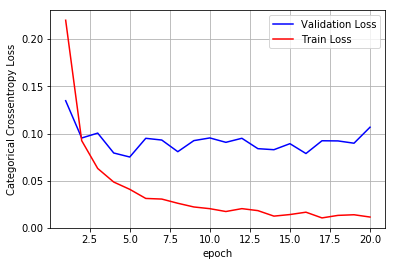

In [51]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**summary**
Here the train loss keeps decreasing as the no of epochs increases,but the validation loss is not decreasing,it means that the
model is overfitting ,here we didnot use batch normalization and dropouts ,and this model is not sensible

 <h2>3.2 MLP + ReLU + ADAM + Batch Norm  </h2>

In [52]:
# Multilayer perceptron

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer='he_normal'))
model_batch.add(BatchNormalization())
model_batch.add(Dense(412, activation='relu', kernel_initializer='he_normal') )
model_batch.add(Dense(312, activation='relu', kernel_initializer='he_normal') )
model_batch.add(BatchNormalization())
model_batch.add(Dense(212, activation='relu', kernel_initializer='he_normal') )
model_batch.add(Dense(112, activation='relu', kernel_initializer='he_normal') )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
dense_47 (Dense)             (None, 412)               211356    
_________________________________________________________________
dense_48 (Dense)             (None, 312)               128856    
_________________________________________________________________
batch_normalization_12 (Batc (None, 312)               1248      
_________________________________________________________________
dense_49 (Dense)             (None, 212)               66356     
_________________________________________________________________
dense_50 (Dense)             (None, 112)               23856     
__________

In [53]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.2052 - acc: 0.9375 - val_loss: 0.1086 - val_acc: 0.9650
Epoch 2/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0826 - acc: 0.9744 - val_loss: 0.1086 - val_acc: 0.9677
Epoch 3/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0575 - acc: 0.9816 - val_loss: 0.0808 - val_acc: 0.9743
Epoch 4/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0469 - acc: 0.9848 - val_loss: 0.0903 - val_acc: 0.9711
Epoch 5/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0403 - acc: 0.9866 - val_loss: 0.1040 - val_acc: 0.9693
Epoch 6/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0345 - acc: 0.9883 - val_loss: 0.0933 - val_acc: 0.9756
Epoch 7/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0295 - acc: 0.9904 - val_loss: 0.0791 - val_ac

Test score: 0.07667895425898896
Test accuracy: 0.9811


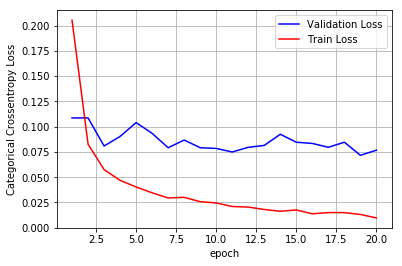

In [54]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**summary**
Here the train loss keeps decreasing as the no of epochs increases,but the validation loss is not decreasing,it means that the
model is overfitting ,here we have used batch normalization but there is no enhance in results.So this model is not sensible

<h2>3.3 MLP + ReLU + ADAM + Dropout </h2>


In [55]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer='he_normal'))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(412, activation='relu', kernel_initializer='he_normal'))
    
model_drop.add(Dense(312, activation='relu', kernel_initializer='he_normal'))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(212, activation='relu', kernel_initializer='he_normal'))
   
model_drop.add(Dense(112, activation='relu', kernel_initializer='he_normal'))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 412)               211356    
_________________________________________________________________
dense_54 (Dense)             (None, 312)               128856    
_________________________________________________________________
dropout_12 (Dropout)         (None, 312)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 212)               66356     
_________________________________________________________________
dense_56 (Dense)             (None, 112)               23856     
__________

In [56]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.5890 - acc: 0.8162 - val_loss: 0.1616 - val_acc: 0.9522
Epoch 2/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.2476 - acc: 0.9354 - val_loss: 0.1187 - val_acc: 0.9653
Epoch 3/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.1881 - acc: 0.9495 - val_loss: 0.1167 - val_acc: 0.9668
Epoch 4/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.1629 - acc: 0.9558 - val_loss: 0.0989 - val_acc: 0.9737
Epoch 5/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.1413 - acc: 0.9618 - val_loss: 0.0872 - val_acc: 0.9752
Epoch 6/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.1304 - acc: 0.9651 - val_loss: 0.0870 - val_acc: 0.9771
Epoch 7/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.1208 - acc: 0.9683 - val_loss: 0.0839 - val_acc

Test score: 0.07530222116742953
Test accuracy: 0.9828


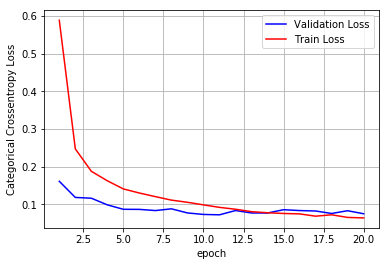

In [57]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**summary**
Here the both train loss and validation loss keeps decreasing as the no of epochs increases,it means that the we are getting maximum
test accuracy and the model is performing very well as we have used dropouts .So this model is sensible.

<h2>3.4 MLP + ReLU + ADAM + Batch Norm + Dropout </h2>


In [58]:
from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer='he_normal'))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(412, activation='relu', kernel_initializer='he_normal'))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(312, activation='relu', kernel_initializer='he_normal'))
model_drop.add(BatchNormalization())

model_drop.add(Dense(212, activation='relu', kernel_initializer='he_normal'))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(112, activation='relu', kernel_initializer='he_normal'))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_14 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 412)               211356    
_________________________________________________________________
dropout_15 (Dropout)         (None, 412)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 312)               128856    
_________________________________________________________________
batch_normalization_15 (Batc (None, 312)               1248      
__________

In [59]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.8487 - acc: 0.7402 - val_loss: 0.1915 - val_acc: 0.9425
Epoch 2/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.3095 - acc: 0.9121 - val_loss: 0.1351 - val_acc: 0.9606
Epoch 3/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.2294 - acc: 0.9364 - val_loss: 0.1100 - val_acc: 0.9674
Epoch 4/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.1931 - acc: 0.9462 - val_loss: 0.0966 - val_acc: 0.9719
Epoch 5/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.1699 - acc: 0.9535 - val_loss: 0.1033 - val_acc: 0.9720
Epoch 6/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.1582 - acc: 0.9566 - val_loss: 0.0890 - val_acc: 0.9743
Epoch 7/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.1404 - acc: 0.9609 - val_loss: 0.0836 - val_ac

Test score: 0.061292790147161574
Test accuracy: 0.9824


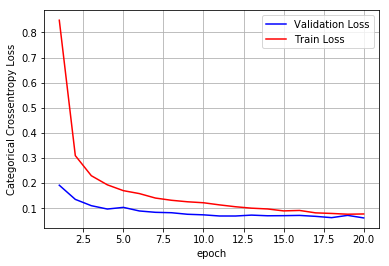

In [60]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**summary**
Here the both train loss and validation loss keeps decreasing as the no of epochs increases,it means that the we are getting maximum
test accuracy and the model is performing very well as we have used both batch normalization and  dropouts .So this model is sensible

# Conclusions 

In [30]:
from prettytable import PrettyTable
   
pt = PrettyTable()


pt.field_names = ["Model", "Test Score","Test Accuracy"]
pt.align["Model"] = "l"

pt.add_row(["1. TWO HIDDEN LAYERS(784-324-124-10)", "", ""])
pt.add_row(["1.1 MLP+Relu+Adam", "0.088", "0.981"])
pt.add_row(["1.2 MLP+Relu+Adam+BatchNorm", "0.080", "0.982"])
pt.add_row(["1.3 MLP+Relu+Adam+Dropouts", "0.064", "0.982"])
pt.add_row(["1.4 MLP+Relu+Adam+BatchNorm+Dropouts", "0.051", "0.983"])
pt.add_row(["", "", ""])

pt.add_row(["2. THREE HIDDEN LAYERS(784-356-256-156-10)", "", ""])
pt.add_row(["2.1 MLP+Relu+Adam", "0.100", "0.979"])
pt.add_row(["2.2 MLP+Relu+Adam+Batch Norm", "0.983","0.986"])
pt.add_row(["2.3 MLP+Relu+Adam+Dropouts", "0.073", "0.981"])
pt.add_row(["2.4 MLP+Relu+Adam+Batch Norm+Dropouts", "0.062", "0.982"])
pt.add_row(["", "", ""])

pt.add_row(["3. FIVE HIDDEN LAYERS(784-512-412-312-212-112-10)", "", ""])
pt.add_row(["3.1 MLP+Relu+Adam", "0.106", "0.977"])
pt.add_row(["3.2 MLP+Relu+Adam+Batch Norm", "0.076", "0.981"])
pt.add_row(["3.3 MLP+Relu+Adam+Dropouts", "0.078", "0.982"])
pt.add_row(["3.4 MLP+Relu+Adam+Batch Norm+Dropouts", "0.061", "0.982"])


print(pt)


+---------------------------------------------------+------------+---------------+
| Model                                             | Test Score | Test Accuracy |
+---------------------------------------------------+------------+---------------+
| 1. TWO HIDDEN LAYERS(784-324-124-10)              |            |               |
| 1.1 MLP+Relu+Adam                                 |   0.088    |     0.981     |
| 1.2 MLP+Relu+Adam+BatchNorm                       |   0.080    |     0.982     |
| 1.3 MLP+Relu+Adam+Dropouts                        |   0.064    |     0.982     |
| 1.4 MLP+Relu+Adam+BatchNorm+Dropouts              |   0.051    |     0.983     |
|                                                   |            |               |
| 2. THREE HIDDEN LAYERS(784-356-256-156-10)        |            |               |
| 2.1 MLP+Relu+Adam                                 |   0.100    |     0.979     |
| 2.2 MLP+Relu+Adam+Batch Norm                      |   0.983    |     0.986     |
| 2.

1. From all the three models we have observed that dropouts playing a crucial role for getting the very good model and prevent      the model from overfitting.
2. Here the combination of both batch normalization and dropouts also giving the similar results as model with only dropouts.
3. As no. of layers increase the model is performing well.
4. so we can conclude that if we use both batch normalization and dropouts we will get very good results